# Monte Carlo Simulation 
## MC simulation based on different portfolio weights between US Large Cap stocks and Total US Bond Market, assuming different withdrawal rates and Normal or Student-t distribution

In [46]:
# Import libraries
import numpy as np
import pandas as pd
from scipy.stats import t
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
# Load Asset Class historical returns 
historical_returns = pd.read_csv('resources/asset_class_returns.csv')
historical_returns.head()

,Year,Inflation,US Stock Market,US Large Cap,US Large Cap Value,US Large Cap Growth,US Mid Cap,US Mid Cap Value,US Mid Cap Growth,US Small Cap,...,Corporate Bonds,Long-Term Corporate Bonds,High Yield Corporate Bonds,Short-Term Tax-Exempt,Intermediate-Term Tax-Exempt,Long-Term Tax-Exempt,REIT,Gold,Precious Metals,Commodities
0,1972,0.0341,0.1762,0.1895,0.1532,0.2297,0.0802,0.1194,0.0429,0.0866,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4902,NaN,NaN
1,1973,0.0871,-0.1818,-0.1618,-0.0979,-0.2309,-0.2420,-0.1377,-0.3296,-0.3285,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7296,NaN,NaN
2,1974,0.1234,-0.2781,-0.2693,-0.2113,-0.3234,-0.2634,-0.1980,-0.3264,-0.2759,...,NaN,-0.0227,NaN,NaN,NaN,NaN,NaN,0.6615,NaN,NaN
3,1975,0.0694,0.3782,0.3695,0.4067,0.3310,0.4869,0.5679,0.4195,0.5513,...,NaN,0.0995,NaN,NaN,NaN,NaN,NaN,-0.2480,NaN,NaN
4,1976,0.0486,0.2647,0.2418,0.3332,0.1485,0.3667,0.4679,0.2654,0.4533,...,NaN,0.1535,NaN,NaN,NaN,NaN,NaN,-0.0410,NaN,NaN


In [48]:
# Extract data for "US Large Cap" and "Total US Bond Market"
us_large_cap_data = historical_returns['US Large Cap']
total_us_bond_data = historical_returns['Total US Bond Market']

# Calculate mean return and standard deviation for "US Large Cap"
mean_return_large_cap = np.mean(us_large_cap_data)
std_dev_large_cap = np.std(us_large_cap_data)

# Calculate mean return and standard deviation for "Total US Bond Market"
mean_return_bond_market = np.mean(total_us_bond_data)
std_dev_bond_market = np.std(total_us_bond_data)

mean_return_large_cap, std_dev_large_cap, mean_return_bond_market, std_dev_bond_market


(0.11752692307692306,
 0.1722102841512539,
 0.050897297297297285,
 0.05618721835265483)

## Monte Carlo Simulation based on Normal Distribution

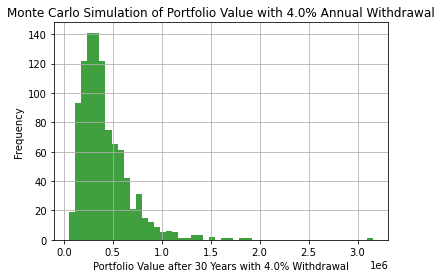

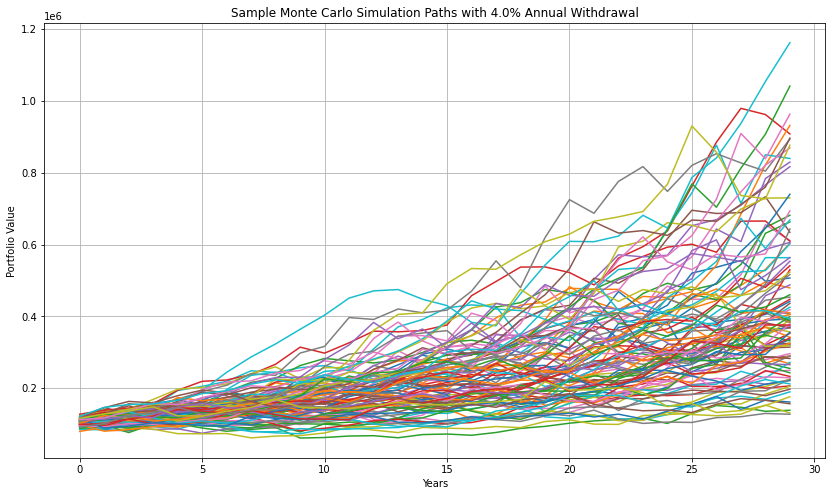

Monte Carlo Simulation Results with 4.0% Annual Withdrawal:
- Mean Portfolio Value: $415,185.09
- Median Portfolio Value: $355,118.09
- Minimum Portfolio Value: $52,419.95
- Maximum Portfolio Value: $3,160,144.69


In [49]:
# Initialization Values
initial_portfolio_value = 100000  # Starting value of the portfolio
years = 30  # Time horizon for the simulation
num_simulations = 1000  # Number of Monte Carlo simulations
withdrawal_rate = 0.04  # Percentage of portfolio withdrawn annually

# Portfolio Weights
weight_large_cap = 0.6  # Set weights for large cap stocks in the portfolio
weight_bond_market = 0.4  # Set weights for bonds in the portfolio

# Arrays to store simulation results
end_portfolio_values_withdrawal = np.zeros(num_simulations)  # End values for each simulation
num_paths_to_plot = 100  # Number of simulation paths to plot
portfolio_values_over_time = np.zeros((years, num_paths_to_plot))  # Portfolio values over time for a subset of simulations

def monte_carlo_simulation():
    """
    Runs a Monte Carlo simulation to project portfolio values over time
    considering random returns and annual withdrawals.
    """
    for i in range(num_simulations):
        portfolio_value = initial_portfolio_value
        for j in range(years):
            random_return_large_cap = np.random.normal(loc=mean_return_large_cap, scale=std_dev_large_cap)
            random_return_bond_market = np.random.normal(loc=mean_return_bond_market, scale=std_dev_bond_market)
            
            portfolio_return = (weight_large_cap * random_return_large_cap) + (weight_bond_market * random_return_bond_market)
            portfolio_value *= (1 + portfolio_return) * (1 - withdrawal_rate)
            
            if i < num_paths_to_plot:
                portfolio_values_over_time[j, i] = portfolio_value

        end_portfolio_values_withdrawal[i] = portfolio_value

# Run MC simulation
monte_carlo_simulation()

# Visualization: Histogram of end portfolio values
plt.hist(end_portfolio_values_withdrawal, bins=50, alpha=0.75, color='green')
plt.xlabel(f'Portfolio Value after {years} Years with {withdrawal_rate*100}% Withdrawal')
plt.ylabel('Frequency')
plt.title(f'Monte Carlo Simulation of Portfolio Value with {withdrawal_rate*100}% Annual Withdrawal')
plt.grid(True)
plt.show()

# Visualization: Sample simulation paths
plt.figure(figsize=(14, 8))
for i in range(num_paths_to_plot):
    plt.plot(range(years), portfolio_values_over_time[:, i])
plt.xlabel('Years')
plt.ylabel('Portfolio Value')
plt.title(f'Sample Monte Carlo Simulation Paths with {withdrawal_rate*100}% Annual Withdrawal')
plt.grid(True)
plt.show()

# Calculating and displaying summary statistics
mean_end_value_withdrawal = np.mean(end_portfolio_values_withdrawal)
median_end_value_withdrawal = np.median(end_portfolio_values_withdrawal)
min_end_value_withdrawal = np.min(end_portfolio_values_withdrawal)
max_end_value_withdrawal = np.max(end_portfolio_values_withdrawal)

result = (f'Monte Carlo Simulation Results with {withdrawal_rate*100}% Annual Withdrawal:\n'
          f'- Mean Portfolio Value: ${mean_end_value_withdrawal:,.2f}\n'
          f'- Median Portfolio Value: ${median_end_value_withdrawal:,.2f}\n'
          f'- Minimum Portfolio Value: ${min_end_value_withdrawal:,.2f}\n'
          f'- Maximum Portfolio Value: ${max_end_value_withdrawal:,.2f}')

print(result)


## Monte Carlo Simulation based on Student-t Distribution

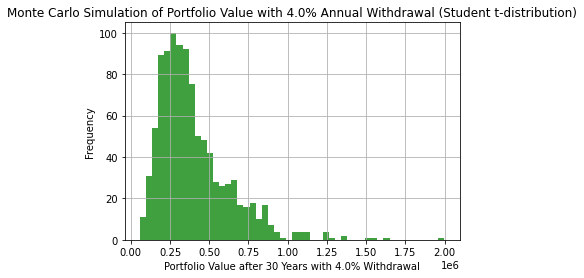

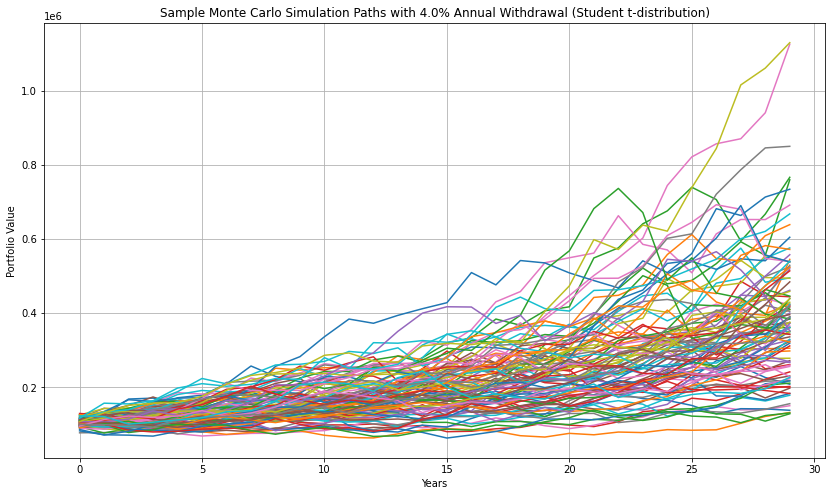

Monte Carlo Simulation Results with 4.0% Annual Withdrawal (Student t-distribution:)
- Degrees of Freedom for US Large Cap: 146.11
- Degrees of Freedom for Total US Bond Market: 4.74
- Mean Portfolio Value: $399,476.77
- Median Portfolio Value: $339,612.03
- Minimum Portfolio Value: $57,976.72
- Maximum Portfolio Value: $1,998,808.95


In [50]:
# Estimating df using Maximum Likelihood Estimation (MLE)
params_large_cap = t.fit(us_large_cap_data.dropna())
params_bond_market = t.fit(total_us_bond_data.dropna())
df_large_cap = params_large_cap[0]
df_bond_market = params_bond_market[0]

# Arrays to store simulation results
end_portfolio_values_withdrawal = np.zeros(num_simulations)  # End values for each simulation
portfolio_values_over_time = np.zeros((years, num_paths_to_plot))  # Portfolio values over time for a subset of simulations
num_paths_to_plot = 100  # Number of simulation paths to plot

def monte_carlo_simulation():
    """
    Runs a Monte Carlo simulation to project portfolio values over time
    considering random returns (using Student's t-distribution) and annual withdrawals.
    """
    for i in range(num_simulations):
        portfolio_value = initial_portfolio_value
        for j in range(years):
            random_return_large_cap = np.random.standard_t(df_large_cap) * std_dev_large_cap + mean_return_large_cap
            random_return_bond_market = np.random.standard_t(df_bond_market) * std_dev_bond_market + mean_return_bond_market
            
            portfolio_return = (weight_large_cap * random_return_large_cap) + (weight_bond_market * random_return_bond_market)
            portfolio_value *= (1 + portfolio_return) * (1 - withdrawal_rate)
            
            if i < num_paths_to_plot:
                portfolio_values_over_time[j, i] = portfolio_value

        end_portfolio_values_withdrawal[i] = portfolio_value

# Run MC simulation
monte_carlo_simulation()

# Visualization: Histogram of end portfolio values
plt.hist(end_portfolio_values_withdrawal, bins=50, alpha=0.75, color='green')
plt.xlabel(f'Portfolio Value after {years} Years with {withdrawal_rate*100}% Withdrawal')
plt.ylabel('Frequency')
plt.title(f'Monte Carlo Simulation of Portfolio Value with {withdrawal_rate*100}% Annual Withdrawal (Student t-distribution)')
plt.grid(True)
plt.show()

# Visualization: Sample simulation paths
plt.figure(figsize=(14, 8))
for i in range(num_paths_to_plot):
    plt.plot(range(years), portfolio_values_over_time[:, i])
plt.xlabel('Years')
plt.ylabel('Portfolio Value')
plt.title(f'Sample Monte Carlo Simulation Paths with {withdrawal_rate*100}% Annual Withdrawal (Student t-distribution)')
plt.grid(True)
plt.show()

# Calculating and displaying summary statistics
mean_end_value_withdrawal = np.mean(end_portfolio_values_withdrawal)
median_end_value_withdrawal = np.median(end_portfolio_values_withdrawal)
min_end_value_withdrawal = np.min(end_portfolio_values_withdrawal)
max_end_value_withdrawal = np.max(end_portfolio_values_withdrawal)

result = (f'Monte Carlo Simulation Results with {withdrawal_rate*100}% Annual Withdrawal (Student t-distribution:)\n'
          f'- Degrees of Freedom for US Large Cap: {df_large_cap:.2f}\n'
          f'- Degrees of Freedom for Total US Bond Market: {df_bond_market:.2f}\n'
          f'- Mean Portfolio Value: ${mean_end_value_withdrawal:,.2f}\n'
          f'- Median Portfolio Value: ${median_end_value_withdrawal:,.2f}\n'
          f'- Minimum Portfolio Value: ${min_end_value_withdrawal:,.2f}\n'
          f'- Maximum Portfolio Value: ${max_end_value_withdrawal:,.2f}')

print(result)
